In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import category_encoders as ce
import math

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
dataframe = pd.read_csv('https://www.dropbox.com/s/360xhh2d9lnaek3/allegro-api-transactions.csv?dl=1')

In [6]:
dataframe.head()


,lp,date,item_id,categories,pay_option_on_delivery,pay_option_transfer,seller,price,it_is_allegro_standard,it_quantity,it_is_brand_zone,it_seller_rating,it_location,main_category
0,0,2016-04-03 21:21:08,4753602474,"['Komputery', 'Dyski i napędy', 'Nośniki', 'No...",1,1,radzioch666,59.99,1,997,0,50177,Warszawa,Komputery
1,1,2016-04-03 15:35:26,4773181874,"['Odzież, Obuwie, Dodatki', 'Bielizna damska',...",1,1,InwestycjeNET,4.90,1,9288,0,12428,Warszawa,"Odzież, Obuwie, Dodatki"
2,2,2016-04-03 14:14:31,4781627074,"['Dom i Ogród', 'Budownictwo i Akcesoria', 'Śc...",1,1,otostyl_com,109.90,1,895,0,7389,Leszno,Dom i Ogród
3,3,2016-04-03 19:55:44,4783971474,"['Książki i Komiksy', 'Poradniki i albumy', 'Z...",1,1,Matfel1,18.50,0,971,0,15006,Wola Krzysztoporska,Książki i Komiksy
4,4,2016-04-03 18:05:54,4787908274,"['Odzież, Obuwie, Dodatki', 'Ślub i wesele', '...",1,1,PPHU_RICO,19.90,1,950,0,32975,BIAŁYSTOK,"Odzież, Obuwie, Dodatki"


### Target encoding

In [7]:
import category_encoders
te=category_encoders.target_encoder.TargetEncoder(dataframe)
dataframe_tmp = dataframe.copy()
encoded=te.fit_transform(dataframe["it_location"],dataframe["price"])
dataframe_tmp["target_encoded"] = encoded
dataframe_tmp[["it_location", "price", "target_encoded"]].head()

,it_location,price,target_encoded
0,Warszawa,59.99,85.423398
1,Warszawa,4.90,85.423398
2,Leszno,109.90,61.990914
3,Wola Krzysztoporska,18.50,35.433365
4,BIAŁYSTOK,19.90,117.191956


Przewaga nad one hot polega na tym, że dodajemy tylko jedną kolumnę do ramki danych.

### One hot encoding

In [8]:
from sklearn.preprocessing import OneHotEncoder
ohc = OneHotEncoder()
ohe = ohc.fit_transform(dataframe.main_category.values.reshape(-1,1)).toarray()
dfOneHot = pd.DataFrame(ohe, columns = [str(ohc.categories_[0][i])
                                       for i in range (len(ohc.categories_[0]))])
df_OneHot = pd.concat([dataframe, dfOneHot], axis=1)
df_OneHot.iloc[:,12:].head()

,it_location,main_category,Antyki i Sztuka,Bilety,Biuro i Reklama,Biżuteria i Zegarki,Delikatesy,Dla Dzieci,Dom i Ogród,Filmy,...,Nieruchomości,"Odzież, Obuwie, Dodatki",Przemysł,RTV i AGD,Rękodzieło,Sport i Turystyka,"Sprzęt estradowy, studyjny i DJ-ski",Telefony i Akcesoria,Uroda,Zdrowie
0,Warszawa,Komputery,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Warszawa,"Odzież, Obuwie, Dodatki",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Leszno,Dom i Ogród,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Wola Krzysztoporska,Książki i Komiksy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Tworzymy kolumny i jeżeli rekord należy do którejs kategorii to oznaczamy tam '1'.

### Binary encoding

In [9]:
encoder = ce.BinaryEncoder(cols=['main_category'])
dfbin = encoder.fit_transform(dataframe["main_category"])
df_binary = pd.concat([dataframe, dfbin], axis=1)
df_binary.iloc[:,12:].head()

,it_location,main_category,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,Warszawa,Komputery,0,0,0,0,0,1
1,Warszawa,"Odzież, Obuwie, Dodatki",0,0,0,0,1,0
2,Leszno,Dom i Ogród,0,0,0,0,1,1
3,Wola Krzysztoporska,Książki i Komiksy,0,0,0,1,0,0
4,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",0,0,0,0,1,0


Podobne do one hot, jednak kazdej kategorii przypisujemy unikalny układ '0' i '1', co umożliwia ograniczenie liczby dodanych kolumn.

### Helmert Coding

In [10]:
encoder = ce.HelmertEncoder(cols=['main_category'])
dfhelmer = encoder.fit_transform(dataframe["main_category"])
df_helmert = pd.concat([dataframe, dfbin], axis=1)
df_helmert.iloc[:,12:].head()

,it_location,main_category,main_category_0,main_category_1,main_category_2,main_category_3,main_category_4,main_category_5
0,Warszawa,Komputery,0,0,0,0,0,1
1,Warszawa,"Odzież, Obuwie, Dodatki",0,0,0,0,1,0
2,Leszno,Dom i Ogród,0,0,0,0,1,1
3,Wola Krzysztoporska,Książki i Komiksy,0,0,0,1,0,0
4,BIAŁYSTOK,"Odzież, Obuwie, Dodatki",0,0,0,0,1,0


Kodowanie helmerta działa na podobnej zasadzie co binarne, jednak wzór wyznaczający kody jest inny i dopuszcza liczby inne od 0 i 1.

### Usunięcie losowych 10% cen it_seller_rating

In [19]:
# wybieram tylko 1/100 rekordów, żeby mi się komputer nie pocił
dataframe_sm = dataframe.iloc[1:math.floor(len(dataframe["it_seller_rating"])/100),:].copy()
def delete_random():
    global dataframe2
    randnull = np.random.randint(1, len(dataframe_sm.it_seller_rating)-1, size = math.floor(len(dataframe_sm.it_seller_rating)/10))
    dataframe2 = dataframe_sm[["price", "it_seller_rating" ,"it_quantity"]].copy()
    dataframe2.it_seller_rating[randnull] = math.nan

### Miara RMS

In [41]:
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error
rms = []
for i in range(10):
    delete_random()
    imputer = KNNImputer(n_neighbors=5, weights="uniform")
    imput = imputer.fit_transform(dataframe2)
    dataframe2.it_seller_rating = [row[1] for row in imput]
    rms.append(math.sqrt(mean_squared_error(dataframe2.it_seller_rating, dataframe_sm.it_seller_rating)))

In [42]:
# odchylenie standardowe
print(rms)
np.std(rms)

[10686.2896303515, 9586.84067713368, 9676.107329248915, 9258.353163300906, 8528.476414614, 9453.799169775766, 10203.336970328804, 10920.631429915318, 10457.317410342508, 10183.830608893953]


691.591826906744

### Usunięcie losowych 10% cen it_seller_rating i it_quantity

In [43]:
# funkcja do usuwania losowych rekordow w it_quantity
dataframe_sm = dataframe.iloc[1:math.floor(len(dataframe["it_quantity"])/100),:].copy()
def delete_random_quantity():
    global dataframe2
    randnull = np.random.randint(1, len(dataframe_sm.it_quantity)-1, size = math.floor(len(dataframe_sm.it_quantity)/10))
    dataframe2.it_quantity[randnull] = math.nan

In [44]:
from sklearn.metrics import mean_squared_error
rms2 = []
for i in range(10):
    delete_random()
    delete_random_quantity()
    imputer = KNNImputer(n_neighbors=2, weights="uniform")
    imput = imputer.fit_transform(dataframe2)
    dataframe2.it_seller_rating = [row[1] for row in imput]
    dataframe2.it_quantity = [row[2] for row in imput]
    rms2.append(math.sqrt(mean_squared_error(dataframe2[["it_seller_rating", "it_quantity"]], dataframe_sm[["it_seller_rating", "it_quantity"]])))

In [51]:
print(rms2)
print(np.std(rms2))

[9568.260672403854, 8551.263812736146, 8009.391457456942, 8858.510347224985, 10349.155485966656, 7991.68464912058, 10103.172038820825, 7900.300561775533, 9056.254448842343, 9305.835711017775]
829.2275155913418


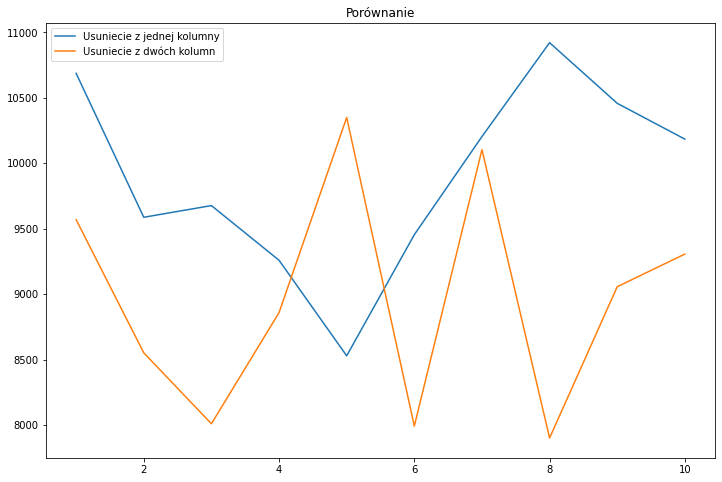

In [61]:
plt.figure(figsize=(12,8))
plt.plot(list(range(1,11)), rms, label = "Usuniecie z jednej kolumny")
plt.plot(list(range(1,11)), rms2, label = "Usuniecie z dwóch kolumn")
plt.title("Porównanie")
plt.legend(loc='best')
plt.show()